# NFL Elimination Picks

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2022.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'TB': 7.5,
 'BUF': 6.4,
 'GB': 6.3,
 'KC': 5.2,
 'CIN': 5.2,
 'BAL': 4.6,
 'LAC': 4.3,
 'PHI': 3.3,
 'LAR': 2.5,
 'LV': 1.4,
 'SF': 1.3,
 'MIA': 1.2,
 'NO': 1.0,
 'ARI': 0.7,
 'WSH': 0.5,
 'CAR': 0.3,
 'IND': 0.0,
 'CLE': -0.0,
 'NE': -0.1,
 'MIN': -0.5,
 'JAX': -0.6,
 'DEN': -0.7,
 'TEN': -2.3,
 'PIT': -2.7,
 'DET': -4.1,
 'ATL': -4.3,
 'NYG': -4.7,
 'NYJ': -5.3,
 'HOU': -5.3,
 'DAL': -6.0,
 'CHI': -7.1,
 'SEA': -8.1}

In [7]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(100_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness


new high score, round     26712, fitness=+54.2
new high score, round     29256, fitness=+81.1


In [8]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff  +5.4 - picking SF  (+1.3  ) over CHI (-7.1+H)
week  2: diff  +9.8 - picking LAR (+2.5+H) over ATL (-4.3  )
week  3: diff  +5.7 - picking CLE (-0.0+H) over PIT (-2.7  )
week  4: diff  +2.6 - picking CAR (+0.3+H) over ARI (+0.7  )
week  5: diff +12.1 - picking NO  (+1.0+H) over SEA (-8.1  )
week  6: diff  +3.6 - picking IND (+0.0+H) over JAX (-0.6  )
week  7: diff  +9.7 - picking LV  (+1.4+H) over HOU (-5.3  )
week  8: diff  +2.2 - picking CIN (+5.2  ) over CLE (-0.0+H)
week  9: diff  +5.6 - picking LAC (+4.3  ) over ATL (-4.3+H)
week 10: diff  +5.8 - picking PHI (+3.3+H) over WSH (+0.5  )
week 11: diff +11.6 - picking GB  (+6.3+H) over TEN (-2.3  )
week 12: diff  +9.5 - picking MIA (+1.2+H) over HOU (-5.3  )
week 13: diff  +8.3 - picking BAL (+4.6+H) over DEN (-0.7  )
week 14: diff  +3.2 - picking TB  (+7.5  ) over SF  (+1.3+H)
week 15: diff  +8.2 - picking WSH (+0.5+H) over NYG (-4.7  )
week 16: diff +16.3 - picking KC  (+5.2+H) over SEA (-8.1  )
week 17: diff  +2.0 - pi

[5.4,
 9.8,
 5.7,
 2.6,
 12.1,
 3.6,
 9.7,
 2.2,
 5.6,
 5.8,
 11.6,
 9.5,
 8.3,
 3.2,
 8.2,
 16.3,
 2.0,
 9.5]

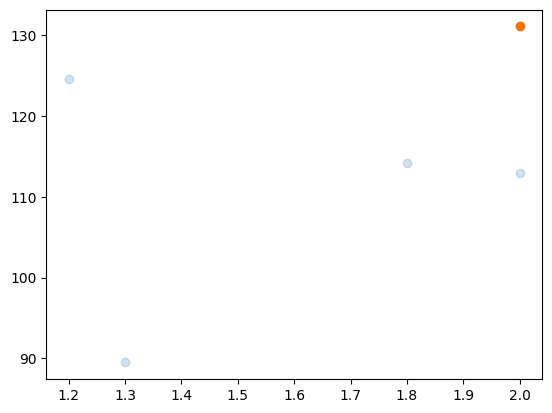

In [9]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <AxesSubplot: xlabel='Week', ylabel='Pick to Win'>)

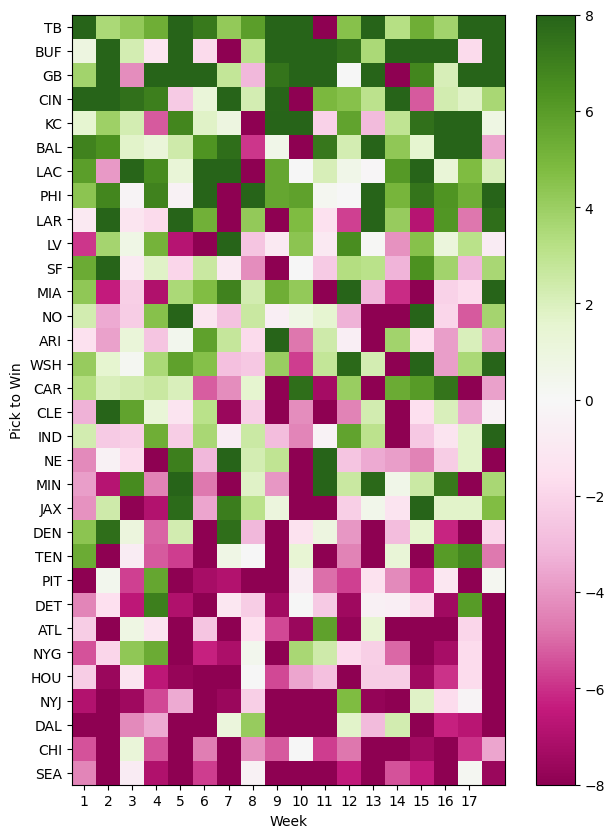

In [10]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [11]:
my_past_picks = [
    "BAL", # week 1
    "GB",  # week 2
]

tuned_home_bump = 1.5

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [12]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [13]:
pp.describe_pick()

week  3: diff  +9.0 - picking CIN (+5.2  ) over NYJ (-5.3+H)
week  4: diff  +8.1 - picking LAC (+4.3  ) over HOU (-5.3+H)
week  5: diff +13.3 - picking TB  (+7.5+H) over ATL (-4.3  )
week  6: diff +10.8 - picking PHI (+3.3+H) over DAL (-6.0  )
week  7: diff  +8.5 - picking NE  (-0.1+H) over CHI (-7.1  )
week  8: diff  +3.8 - picking MIA (+1.2  ) over DET (-4.1+H)
week  9: diff +10.3 - picking ARI (+0.7+H) over SEA (-8.1  )
week 10: diff  +8.4 - picking BUF (+6.4+H) over MIN (-0.5  )
week 11: diff  +7.0 - picking MIN (-0.5+H) over DAL (-6.0  )
week 12: diff  +8.0 - picking LV  (+1.4  ) over SEA (-8.1+H)
week 13: diff +12.1 - picking LAR (+2.5+H) over SEA (-8.1  )
week 14: diff  +6.9 - picking CAR (+0.3  ) over SEA (-8.1+H)
week 15: diff  +9.0 - picking KC  (+5.2  ) over HOU (-5.3+H)
week 16: diff  +4.5 - picking TEN (-2.3+H) over HOU (-5.3  )
week 17: diff  +4.5 - picking DET (-4.1+H) over CHI (-7.1  )
week 18: diff  +8.0 - picking WSH (+0.5+H) over DAL (-6.0  )


In [14]:
pprev.describe_pick()

week  3: diff  +9.0 - picking CIN (+5.2  ) over NYJ (-5.3+H)
week  4: diff  +5.5 - picking DET (-4.1+H) over SEA (-8.1  )
week  5: diff +10.6 - picking NO  (+1.0+H) over SEA (-8.1  )
week  6: diff  +6.1 - picking WSH (+0.5  ) over CHI (-7.1+H)
week  7: diff +13.9 - picking LAC (+4.3+H) over SEA (-8.1  )
week  8: diff  +3.7 - picking NE  (-0.1  ) over NYJ (-5.3+H)
week  9: diff +10.3 - picking ARI (+0.7+H) over SEA (-8.1  )
week 10: diff  +2.9 - picking LV  (+1.4+H) over IND (+0.0  )
week 11: diff  +7.0 - picking MIN (-0.5+H) over DAL (-6.0  )
week 12: diff  +8.0 - picking MIA (+1.2+H) over HOU (-5.3  )
week 13: diff +12.1 - picking LAR (+2.5+H) over SEA (-8.1  )
week 14: diff  +6.9 - picking CAR (+0.3  ) over SEA (-8.1+H)
week 15: diff  +8.9 - picking PHI (+3.3  ) over CHI (-7.1+H)
week 16: diff +12.0 - picking BUF (+6.4  ) over CHI (-7.1+H)
week 17: diff  +7.4 - picking KC  (+5.2+H) over DEN (-0.7  )
week 18: diff +10.3 - picking TB  (+7.5  ) over ATL (-4.3+H)


In [15]:
pprand.describe_pick()

week  3: diff  +9.0 - picking CIN (+5.2  ) over NYJ (-5.3+H)
week  4: diff  +5.5 - picking DET (-4.1+H) over SEA (-8.1  )
week  5: diff +13.3 - picking TB  (+7.5+H) over ATL (-4.3  )
week  6: diff  +6.1 - picking WSH (+0.5  ) over CHI (-7.1+H)
week  7: diff +13.9 - picking LAC (+4.3+H) over SEA (-8.1  )
week  8: diff  +3.8 - picking MIA (+1.2  ) over DET (-4.1+H)
week  9: diff +10.3 - picking ARI (+0.7+H) over SEA (-8.1  )
week 10: diff  +2.9 - picking LV  (+1.4+H) over IND (+0.0  )
week 11: diff  +6.7 - picking NE  (-0.1+H) over NYJ (-5.3  )
week 12: diff  +9.0 - picking BUF (+6.4  ) over DET (-4.1+H)
week 13: diff  +6.3 - picking MIN (-0.5+H) over NYJ (-5.3  )
week 14: diff  +6.9 - picking CAR (+0.3  ) over SEA (-8.1+H)
week 15: diff  +9.0 - picking KC  (+5.2  ) over HOU (-5.3+H)
week 16: diff  +7.8 - picking PHI (+3.3  ) over DAL (-6.0+H)
week 17: diff  +5.2 - picking TEN (-2.3+H) over DAL (-6.0  )
week 18: diff  +9.1 - picking LAR (+2.5  ) over SEA (-8.1+H)


In [16]:
pplg.describe_pick()

week  3: diff  +9.0 - picking CIN (+5.2  ) over NYJ (-5.3+H)
week  4: diff  +8.1 - picking LAC (+4.3  ) over HOU (-5.3+H)
week  5: diff  +8.1 - picking MIN (-0.5+H) over CHI (-7.1  )
week  6: diff  +8.7 - picking TB  (+7.5  ) over PIT (-2.7+H)
week  7: diff  +8.2 - picking LV  (+1.4+H) over HOU (-5.3  )
week  8: diff  +7.5 - picking PHI (+3.3+H) over PIT (-2.7  )
week  9: diff  +9.0 - picking KC  (+5.2+H) over TEN (-2.3  )
week 10: diff  +8.4 - picking BUF (+6.4+H) over MIN (-0.5  )
week 11: diff  +6.7 - picking NE  (-0.1+H) over NYJ (-5.3  )
week 12: diff  +8.0 - picking MIA (+1.2+H) over HOU (-5.3  )
week 13: diff +12.1 - picking LAR (+2.5+H) over SEA (-8.1  )
week 14: diff  +6.9 - picking CAR (+0.3  ) over SEA (-8.1+H)
week 15: diff  +7.9 - picking SF  (+1.3  ) over SEA (-8.1+H)
week 16: diff  +4.5 - picking TEN (-2.3+H) over HOU (-5.3  )
week 17: diff  +4.5 - picking DET (-4.1+H) over CHI (-7.1  )
week 18: diff  +8.0 - picking WSH (+0.5+H) over DAL (-6.0  )


In [17]:
import contextlib
import ctypes
import multiprocessing
import queue
import time

In [18]:
def check_until_when(done_flag, best_q, trial_counter=None, permuter=None, method_name="random_greedy"):
    global ppkwargs
    if permuter is None:
        permuter = pick.Permuter(**ppkwargs)

    best_picks = []
    best_fitness = -100
    trials = 0
    while not done_flag.is_set():
        permuter.pick = getattr(permuter, method_name)()

        if permuter.fitness > best_fitness:
            best_picks = permuter.pick
            best_fitness = permuter.fitness
            best_q.put((best_picks, best_fitness))
        trials += 1
        
    if trial_counter is not None:
        with trial_counter.get_lock():
            trial_counter.value += trials
    return trials

In [19]:
class TestFlag:
    def __init__(self, n_checks=1000):
        self.remaining = n_checks
    def is_set(self):
        self.remaining -= 1
        return self.remaining <= 0
        
test_q = queue.Queue()
start = time.monotonic()
trials = check_until_when(TestFlag(40_000), test_q)
elapsed = time.monotonic() - start
print(f"{trials/elapsed/1000:0.3f}k trials/sec over {elapsed:0.3f} sec")

7.390k trials/sec over 5.413 sec


In [20]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(done_flag, new_best_q, trial_counter))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

New best 1165.9k, via: ..., CIN, LAC, NO, PHI, LV, NE, ARI, TB, BUF, MIA, IND, CAR, KC, MIN, TEN, LAR
New best 1511.7k, via: ..., CIN, DET, NO, WSH, LAC, PHI, ARI, CAR, NE, MIA, LAR, BUF, SF, MIN, KC, TB
New best 1553.5k, via: ..., CIN, DET, NO, WSH, LAC, PHI, ARI, CAR, MIN, MIA, LAR, BUF, SF, KC, TB, IND
New best 1564.6k, via: ..., CIN, LAC, NO, TB, NE, PHI, ARI, CAR, MIN, MIA, LAR, BUF, SF, KC, TEN, WSH
New best 1591.5k, via: ..., CIN, LAC, NO, ARI, NE, PHI, MIA, TB, MIN, BUF, LAR, CAR, SF, KC, TEN, WSH
New best 1816.6k, via: ..., CIN, LAC, NO, ARI, NE, PHI, MIA, TB, MIN, LV, LAR, CAR, SF, BUF, KC, WSH
New best 1819.4k, via: ..., CIN, LAC, NO, ARI, NE, PHI, MIA, BUF, MIN, LV, LAR, CAR, SF, KC, TB, WSH
Tried 5,378,552 permutations in 60.0 sec (89.605k/sec, 3.734k/sec/worker)


## FiveThirtyEight Elo Data

* Links
    * https://projects.fivethirtyeight.com/2022-nfl-predictions/
    * https://github.com/fivethirtyeight/data/tree/master/nfl-elo
* Important Fields
    * `team1`	Abbreviation for home team
    * `team2`	Abbreviation for away team
    * `qbelo_prob1`	Home team's probability of winning according to quarterback-adjusted Elo
    * `qbelo_prob2`	Away team's probability of winning according to quarterback-adjusted Elo

In [21]:
data = anysunday.loaders.five38_elos()

In [22]:
data.shape

(272, 33)

In [23]:
data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,2022-09-08,2022,0,NaN,LAR,BUF,1614.761436,1614.246762,0.593181,0.406819,...,402.149420,175.505078,273.860644,1549.330347,1646.634779,10.0,31.0,91,59,75
1,2022-09-11,2022,0,NaN,NYJ,BAL,1364.983381,1508.988219,0.388223,0.611777,...,112.207146,110.835816,157.662356,1370.565348,1566.536000,9.0,24.0,34,51,43
2,2022-09-11,2022,0,NaN,WSH,JAX,1465.289365,1351.455833,0.736809,0.263191,...,81.266657,135.819927,104.739161,1492.345479,1386.325792,28.0,22.0,18,41,30
3,2022-09-11,2022,0,NaN,CHI,SF,1444.508387,1576.152105,0.405251,0.594749,...,19.897502,104.175533,109.832664,1442.478111,1533.010665,19.0,10.0,37,59,48
4,2022-09-11,2022,0,NaN,DET,PHI,1406.135626,1502.212794,0.455395,0.544605,...,258.100875,151.975037,167.980291,1401.594700,1543.435905,35.0,38.0,33,64,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023-01-08,2022,0,NaN,PIT,CLE,1490.550944,1521.064219,0.549468,0.450532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,82,65
268,2023-01-08,2022,0,NaN,SEA,LAR,1508.373311,1583.678757,0.485174,0.514826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,86,62
269,2023-01-08,2022,0,NaN,DEN,LAC,1457.781797,1512.681274,0.514532,0.485468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,94,81
270,2023-01-08,2022,0,NaN,IND,HOU,1493.184163,1398.110598,0.715339,0.284661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,51,31


In [24]:
import dateutil.parser

NUM_TEAMS = 32
NUM_WEEKS = len(schedule)

WEEK_1_WED = datetime.datetime(year=2022, month=9, day=7)
TEAM_RENAMES = {
    "OAK": "LV",  # Raiders
}

def date_to_week(date):
    if not isinstance(date, datetime.datetime):
        date = dateutil.parser.parse(date)
    day_diff = (date - WEEK_1_WED) / datetime.timedelta(days=1)
    return int((day_diff // 7) + 1)

def pick_grid_538(data):
    powers = {}
    matches = []
    for _index, row in data.iterrows():
        week = date_to_week(row["date"])
        if week > NUM_WEEKS: 
            break
        for n in "12":
            team = row[f"team{n}"]
            elo = row[f"qbelo{n}_post"]
            p_win = row[f"qbelo_prob{n}"]
            if not math.isnan(elo):
                powers[team] = elo
            matches.append((team, week, p_win))

    index = sorted(powers, key=lambda t: powers[t])
    matrix = [[-10] * NUM_TEAMS for _ in range(NUM_WEEKS)]
    for team, week, p_win in matches:
        matrix[week - 1][index.index(team)] = 20 * (p_win - 0.5)
    
    # 538 uses old names as they have historical(ish) data
    index = [TEAM_RENAMES.get(n, n) for n in index]
    return index, matrix

(<Figure size 800x1000 with 2 Axes>,
 <AxesSubplot: xlabel='Week', ylabel='Pick to Win'>)

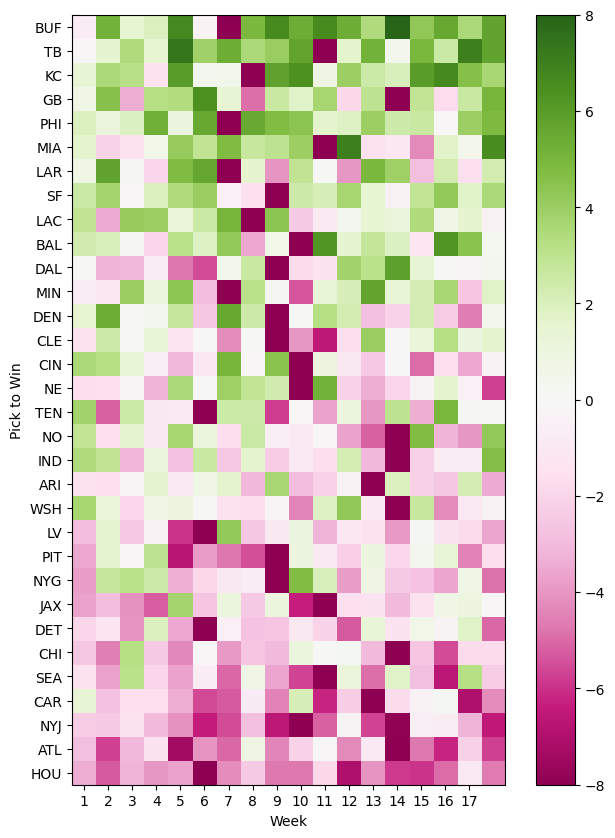

In [25]:
index538, matrix538 = pick_grid_538(data)
viz.plot_matrix(matrix538, index538)

In [26]:
class ProbPickPermuter(pick.Permuter):
    def __init__(self, df, past_picks=None):
        self.past_picks = past_picks or []
        self.n_weeks = NUM_WEEKS

        self.df = df.copy()
        self.df["week"] = self.df["date"].apply(date_to_week)
        
        # ignore postseason games
        self.df = self.df[self.df["week"] <= NUM_WEEKS]
    
        self.grid_index, self.grid = pick_grid_538(self.df)
        
        self.pick = self.greedy()
        
    @property
    def pick_score(self):
        scores = []
        for week in range(NUM_WEEKS):
            pick = self.pick[week]
            pick_index = self.grid_index.index(pick)
            scores.append(self.grid[week][pick_index])
        return scores

In [27]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)
ppp.pick = ppp.greedy()
ppp.fitness

801985.545530996

In [28]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)

best_538_picks = []
best_538_fitness = -100
for n in range(100_000):
    ppp.pick = ppp.random_greedy()
    
    if ppp.fitness > best_538_fitness:
        print("new best fitness", int(ppp.fitness))
        best_538_picks = ppp.pick
        print(" ".join(format(p, ">3s") for p in best_538_picks))
        best_538_fitness = ppp.fitness
        
ppp.pick = best_538_picks
ppp.pick 

new best fitness 718893
BAL  GB LAC PHI  TB LAR DEN  NO BUF NYG  NE MIA MIN DAL  KC TEN SEA IND
new best fitness 759611
BAL  GB CHI LAC  TB LAR DEN PHI BUF NYG  NE WSH MIN DAL  NO  KC SEA MIA
new best fitness 776570
BAL  GB LAC PHI LAR  SF DEN MIN CIN NYG BUF MIA CLE DAL  NO  KC  TB IND
new best fitness 781931
BAL  GB CHI LAC MIN LAR DEN PHI CIN NYG BUF WSH CLE DAL  NO  KC  TB MIA
new best fitness 868496
BAL  GB LAC PHI  TB LAR DEN BUF CIN NYG  NE MIA MIN DAL  NO TEN  KC IND
new best fitness 869679
BAL  GB LAC PHI  KC LAR DEN BUF CIN NYG  NE MIA MIN DAL  NO TEN  TB IND


['BAL',
 'GB',
 'LAC',
 'PHI',
 'KC',
 'LAR',
 'DEN',
 'BUF',
 'CIN',
 'NYG',
 'NE',
 'MIA',
 'MIN',
 'DAL',
 'NO',
 'TEN',
 'TB',
 'IND']

In [29]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(
        done_flag, new_best_q, trial_counter, ProbPickPermuter(data, past_picks=my_past_picks),
    ))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

New best  711.6k, via: ..., LAC, PHI, TB, LAR, DEN, TEN, BUF, NYG, NE, MIA, MIN, DAL, NO, KC, SEA, IND
New best  748.4k, via: ..., LAC, PIT, TB, LAR, DEN, PHI, CIN, NYG, NE, MIA, MIN, BUF, KC, TEN, SEA, IND
New best  794.1k, via: ..., CHI, LAC, KC, LAR, DEN, PHI, CIN, NYG, NE, MIA, MIN, BUF, NO, TEN, TB, IND
New best  835.3k, via: ..., MIN, LAC, BUF, LAR, DEN, PHI, CIN, KC, NE, MIA, CLE, DAL, NO, TEN, TB, IND
New best  843.8k, via: ..., LAC, PHI, MIN, LAR, DEN, BUF, CIN, NYG, NE, WSH, CLE, DAL, NO, KC, TB, MIA
New best  851.0k, via: ..., LAC, PHI, LAR, SF, DEN, BUF, CIN, NYG, NE, MIA, MIN, DAL, KC, TEN, TB, IND
New best  868.5k, via: ..., LAC, PHI, TB, LAR, DEN, BUF, CIN, NYG, NE, MIA, MIN, DAL, NO, TEN, KC, IND
New best  869.7k, via: ..., LAC, PHI, KC, LAR, DEN, BUF, CIN, NYG, NE, MIA, MIN, DAL, NO, TEN, TB, IND
Tried 6,131,359 permutations in 60.0 sec (102.164k/sec, 4.257k/sec/worker)


In [37]:
# print(" ".join(format(n+1, ">3d") for n in range(len(pprand.pick))))
# print(" ".join(format(p, ">3s") for p in pprand.pick))
# print(" ".join(format(p, ">3s") for p in best_538_picks))